# Homework 6 - Women and children first?!

The objective of this homework is to practice simple decision trees. To successfully complete this homework, you may use any resources available to you. 

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column that specifies whether the person is a child (age <= 10)
    * Group the data by `sex`, `child`, `pclass` and interpret the survival rate.
2. Develop a decision tree with depth of 1.
    * Preprocess the `sex` column using LabelEncoder
    * Develop the decision tree
    * Visually reproduce the decision tree using a seaborn barchart.
    * Use the t-test from scipy.stats to statistically reproduce the decision.
    * Interpret the decision tree.
3. Develop a decision tree with depth of 2.
    * Develop the decision tree
    * Visually reproduce the decision tree using seaborn barcharts (left side and right side)
    * Use the ranksums test from scipy.stats to statistically reproduce the decisions.
    * Interpret the decision tree. 
    
Hints:
* Explain what you are doing.
* Use references.

In [408]:
import numpy as np
import pandas as pd
import seaborn as sns

In [409]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeClassifier

In [410]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [411]:
import warnings
warnings.filterwarnings('ignore')

In [412]:
%matplotlib inline

In [413]:
tc = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [414]:
tc.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

## Women and children first?

### Create a column that specifies whether the person is a child (10 years or younger)


In [415]:
tc1 = tc.copy()

In [416]:
# create function to code child column;
# those below age 10 is equal to 1.0 and is a child

def child(x):
    if x <= 10.0000:
        return 1.0
    else:
        return 0.0

In [417]:
# apply to age column and find those who are children
tc1['child'] = tc1['age'].apply(lambda x:child(x))

### Group the data by `sex`, `child`, `pclass` and interpret the survival rate.

In [418]:
tc1.groupby(['sex','child','pclass'])['survived'].mean()

sex     child  pclass
female  0.0    1.0       0.972028
               2.0       0.873684
               3.0       0.491979
        1.0    1.0       0.000000
               2.0       1.000000
               3.0       0.482759
male    0.0    1.0       0.329545
               2.0       0.087500
               3.0       0.138528
        1.0    1.0       1.000000
               2.0       1.000000
               3.0       0.354839
Name: survived, dtype: float64

## Decision Tree with depth of 1

### Restrict your analysis on the relevant columns (check table above).

In [419]:
tc2 = tc1[['survived','pclass','sex','age','child']]

### Preprocess the `sex` column<br>
- recode the 'sex' column into numeric codes

In [420]:
# drop NaN values
tcc = tc2.dropna()

In [421]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
tcc['sex'] = le.fit_transform(tcc['sex'].astype(str))

### Clean the dataset<br>
- here we set our 'X', or past events thats used to predict 'y'<br>
- it is basically everything but 'y' we have stated above, so we drop it to get 'X'

In [423]:
y = tcc['survived']

### Build the decision tree

**Build** and **visualize** a decision tree with depth of 1 (i.e., one root and two leaf nodes) to find differences between passengers who survived and those who did not. 

In [424]:
dtc = DecisionTreeClassifier(max_depth=1).fit(X,y)

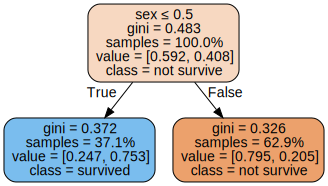

In [425]:
# Visualize our decision tree
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['survived' if i == 1 else 'not survive' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph 

** 37.1% of the passengers were female and ended up at the left branch, and 62.9% were male and ended up on right branch. For female passengers (sex<=0.5), about 75% survived and 25% who didn't. We interpret this from the value=[0.247,0.753]. The first number is the % of y value (survived) is equal to 0(not survived) and the second number is % of y value equal to 1(survived). In this case, 75.3% of female passenger survived, while only 20.5% of male passenger survived. This is also shown visually by the seaborn plot below.**

### Visually reproduce the decision tree using a seaborn factorplot.


In [ ]:
sns.factorplot(x='sex', y='survived', hue='sex', data=tc,kind = 'bar',)

### Use the t-test from `scipy.stats` to statistically reproduce the decision.

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [ ]:
a = tcc[tcc['sex']==0]
b= tcc[tcc['sex']==1]

In [ ]:
t_stat, p_val = stats.ttest_ind(a['survived'],b['survived'], axis=0)
t_stat
p_val

**Here, we are comparing the different gender groups and their survival rate. the very small p-value indicates that the difference we found in survival rates between the gender groups are very significant; they did not occur by chance.**

## Develop a decision tree with depth of 2

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [426]:
dtc2 = DecisionTreeClassifier(max_depth=2).fit(X,y)

You need to adapt the `XXX` in the following code to visualize the decision tree.

In [ ]:
dot_data = tree.export_graphviz(dtc2, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['survived' if i == 1 else 'not survive' for i in dtc2.classes_] ,
                         filled=True, 
                         special_characters=True,
                               proportion=True)  
graph = graphviz.Source(dot_data)  
graph 

**In this decision tree, we are first splitting by gender. On the left side of the first split, we have all the female passengers. This branch is further split by class, where the left bottom branch are those who are female and are from classes 1 and 2; 93.2% of this population survived.**<br><br>

**Going down the right side of the first split, we have all the male passengers. This is further split into children(down right side) which are those who are aged below 9.5. The bottom left branch (age<=9.5 is true) tells us that 58.1% of this population survived, which are the male children.**

###  Visually reproduce the left side of the decision tree using seaborn barcharts<br>
- Seperate the data first by gender (we need only female), and then seperate by class (those in class 1 & 2)<br>
- do this by creating new columns with filtered data corresponding to the column name<br>

In [ ]:
# get only the female passenger data
female = tcc[tcc.sex <=0.5]

In [ ]:
# create column with female passengers in classes 1 & 2
tcc['sex<=0.5'] = tcc.sex<=0.5
female['pclass<=2.5'] = female.pclass<=2.5

In [ ]:
sns.barplot(x= 'pclass<=2.5', y='survived',data=female)

**This chart shows that of the female passengers, those who are from classes 1 and 2 survived at a rate of 93.2%. Those from 3rd class had a much lower survival rate.**

### Use the ranksums test from scipy.stats to statistically reproduce the decision on the left side.


x = the y value(surviveal rate) where pclass<=2.5<br>
y = the y value(survival rate) where pclaass>=2.5<br>

In [ ]:
x = female.survived[female.pclass<=2.5]
y = female.survived[female.pclass>=2.5]

In [ ]:
from scipy.stats import ranksums
stats.ranksums(x, y)

**Similar to the t-test, this small pvalue shows the difference between the two groups (female in 1 & 2 class vs female in 3rd class) are significantly different; our results in survival rate are a result of difference in classes.**

###  Visually reproduce the right side of the decision tree using seaborn barcharts

In [ ]:
tcc['sex>=0.5'] = tcc.sex>=0.5

In [ ]:
male = tcc[tcc.sex>=0.5]
male['age<=9.5'] = male.age<=9.5

In [ ]:
sns.barplot(x= 'age<=9.5', y='survived',data=male)

**This chart shows that of the male passengers, those who are children (below 10 yrs old) have a higher survival rate.**

### Use the ranksums test from scipy.stats to statistically reproduce the decisions on the right side.


In [ ]:
x1 = male.survived[male.age<=9.5]
y1 = male.survived[male.age>=9.5]

In [ ]:
stats.ranksums(x1, y1)

** Similar to the previous ransum result, the pvalue is very small, indicating significance in the difference between the two group the test is based on (those male who are children and those male who are older than 10 yrs old).**<br><br>

** In conclusion, those who are female and in upper classes (1 & 2) have the highest survival rate, while those who are male and survived are children. In general, the hypothesis of high survival rates among women and children were true. Lower classes have lower survival rates, potentially due to large population and crowded spaces below decks makes a hazard when it comes to evacuation; this makes lower class passengers have low survival rate to begin with.**

### Sources:<br>
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f - t-test<br>
https://stackoverflow.com/questions/22611446/perform-2-sample-t-test -t-test example<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html - t-test<br>
https://en.wikipedia.org/wiki/Mann–Whitney_U_test - ransum test<br>
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ranksums.html - ranksum test<br>